# 1.Problem Statement

# Import Libraries

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import MinMaxScaler,StandardScaler, LabelEncoder

# 2. Data Gathering

In [2]:
df = pd.read_csv('train_data.csv')
df.shape

(318438, 18)

### 2.1 Data information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [4]:
df.describe()

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
count,318438.000000,318438.000000,318438.000000,318438.000000,318325.000000,318438.000000,313906.000000,318438.000000,318438.000000
mean,159219.500000,18.318841,4.771717,3.197627,2.625807,65747.579472,7.251859,3.284099,4880.749392
std,91925.276847,8.633755,3.102535,1.168171,0.873146,37979.936440,4.745266,1.764061,1086.776254
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1800.000000
25%,79610.250000,11.000000,2.000000,2.000000,2.000000,32847.000000,4.000000,2.000000,4186.000000
50%,159219.500000,19.000000,5.000000,3.000000,3.000000,65724.500000,8.000000,3.000000,4741.000000
75%,238828.750000,26.000000,7.000000,4.000000,3.000000,98470.000000,8.000000,4.000000,5409.000000
max,318438.000000,32.000000,13.000000,24.000000,4.000000,131624.000000,38.000000,32.000000,11008.000000


In [5]:
cat_features = df.select_dtypes(include = 'object').columns
print("Cat features are :",cat_features),len(cat_features)

Cat features are : Index(['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type',
       'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness', 'Age',
       'Stay'],
      dtype='object')


(None, 9)

In [6]:
num_features = df.select_dtypes(exclude = 'object').columns
print("Cat features are :",num_features),len(num_features)

Cat features are : Index(['case_id', 'Hospital_code', 'City_Code_Hospital',
       'Available Extra Rooms in Hospital', 'Bed Grade', 'patientid',
       'City_Code_Patient', 'Visitors with Patient', 'Admission_Deposit'],
      dtype='object')


(None, 9)

# 3. Exploratory Data Analysis

### 3.1 Count of Stay

In [8]:
df['Stay'].value_counts()

21-30                 87491
11-20                 78139
31-40                 55159
51-60                 35018
0-10                  23604
41-50                 11743
71-80                 10254
More than 100 Days     6683
81-90                  4838
91-100                 2765
61-70                  2744
Name: Stay, dtype: int64

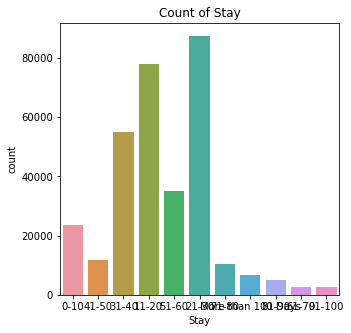

In [10]:
plt.figure(figsize=(5,5))
plt.title('Count of Stay')
sns.countplot(x=df['Stay'])
plt.xticks()
plt.show()


<AxesSubplot:ylabel='Stay'>

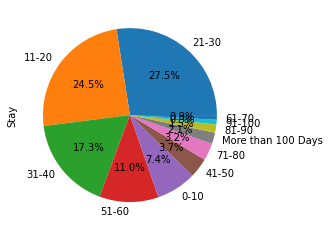

In [11]:
df['Stay'].value_counts().plot(kind ='pie',autopct='%1.1f%%')

## 3.2 Distribution of Age

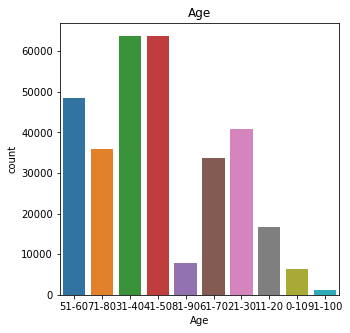

In [14]:
plt.figure(figsize=(5,5))
plt.title('Age')
sns.countplot(x=df['Age'])
plt.xticks()
plt.show()

In [11]:
# sns.distplot(df['loan_amnt'])

## 3.3 Count plot of Bed type

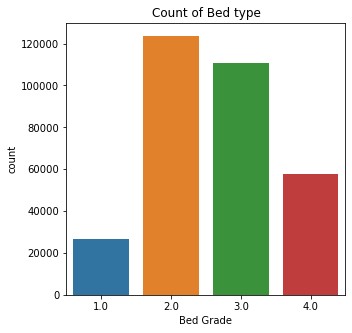

In [24]:
plt.figure(figsize=(5,5))
plt.title('Count of Bed type')
sns.countplot(x=df['Bed Grade'])
labels = df['Bed Grade'].unique()

plt.xticks()
plt.show()

<AxesSubplot:ylabel='Bed Grade'>

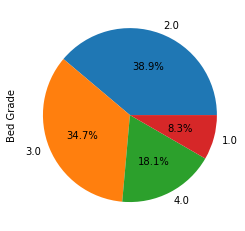

In [17]:
df['Bed Grade'].value_counts().plot(kind ='pie',labels = labels,autopct='%1.1f%%')

## 3.5 Admission_Deposit


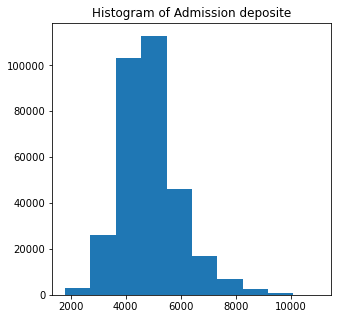

In [19]:
plt.figure(figsize=(5,5))
plt.title('Histogram of Admission deposite')
plt.hist(x=df['Admission_Deposit'])
plt.show()

/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Admission_Deposit', ylabel='Density'>

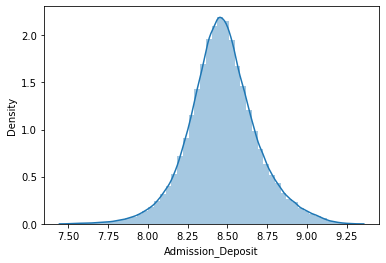

In [27]:
sns.distplot(np.log(df['Admission_Deposit']))

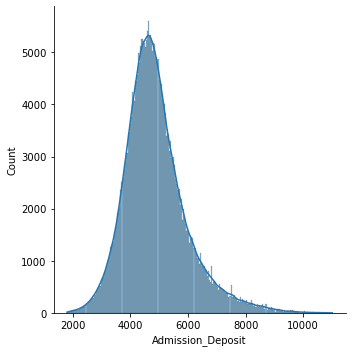

In [33]:
sns.displot(df['Admission_Deposit'],kde=True)

# 3.6 City code

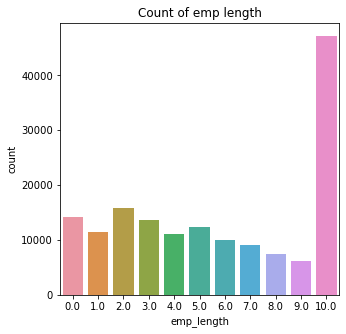

In [15]:
plt.figure(figsize=(5,5))
plt.title('Count of emp length')
sns.countplot(x=df['emp_length'])
labels = df['emp_length'].unique()

plt.xticks(ticks=np.arange(11))
plt.show()

## 3.7 Available Extra Rooms in Hospital


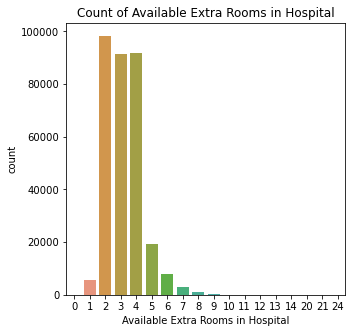

In [21]:
plt.figure(figsize=(5,5))
plt.title('Count of Available Extra Rooms in Hospital')
sns.countplot(x=df['Available Extra Rooms in Hospital'])
labels = df['Available Extra Rooms in Hospital'].unique()

plt.xticks(ticks=np.arange(len(labels)))
plt.show()

# 3.8 Hospital_type_code

<AxesSubplot:ylabel='Hospital_type_code'>

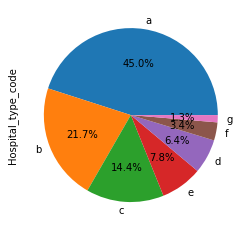

In [23]:
df['Hospital_type_code'].value_counts().plot(kind ='pie',autopct='%1.1f%%')

# 3.9 Severity of Illness

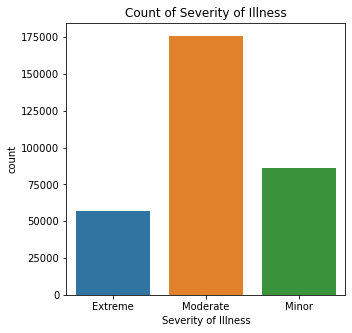

In [25]:
plt.figure(figsize=(5,5))
plt.title('Count of Severity of Illness')
sns.countplot(x=df['Severity of Illness'])
labels = df['Severity of Illness'].unique()

plt.xticks()
plt.show()

# 3.10 Department

<AxesSubplot:ylabel='Department'>

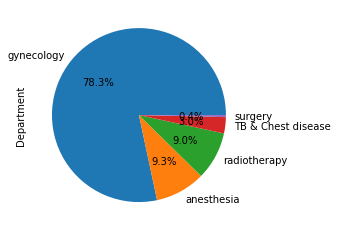

In [26]:
df['Department'].value_counts().plot(kind ='pie',autopct='%1.1f%%')

# 3.11 Visitors with Patient

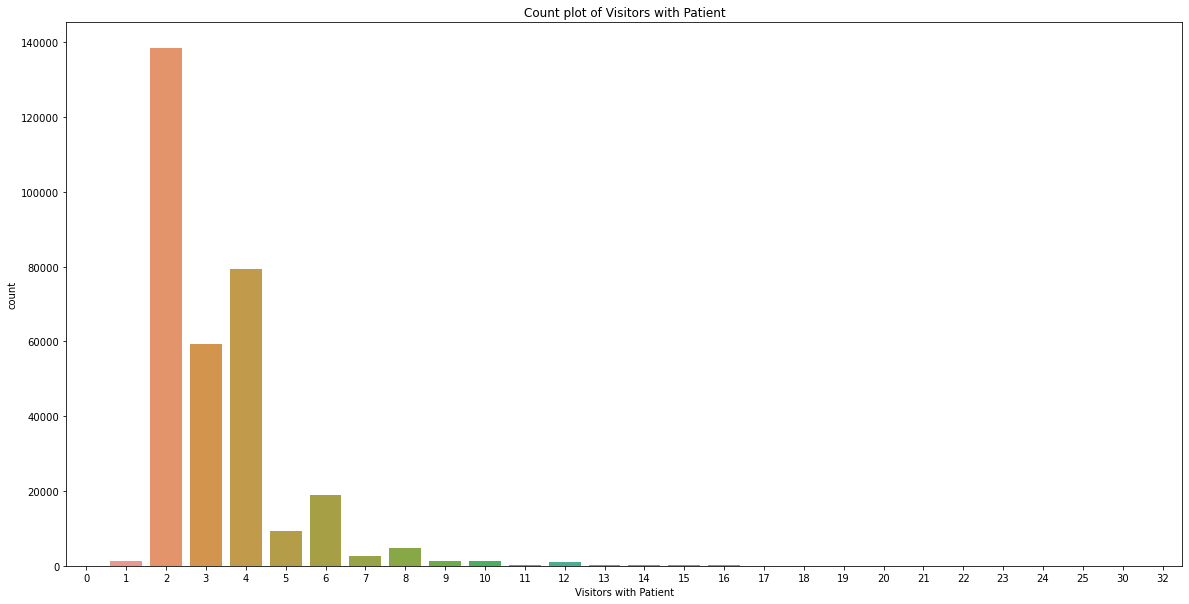

In [22]:
plt.figure(figsize=(20,10))
plt.title('Count plot of Visitors with Patient')
sns.countplot(x=df['Visitors with Patient'])
labels = df['Visitors with Patient'].unique()

plt.xticks(ticks=np.arange(len(labels)))
plt.show()

# 3.12 Ward_Type

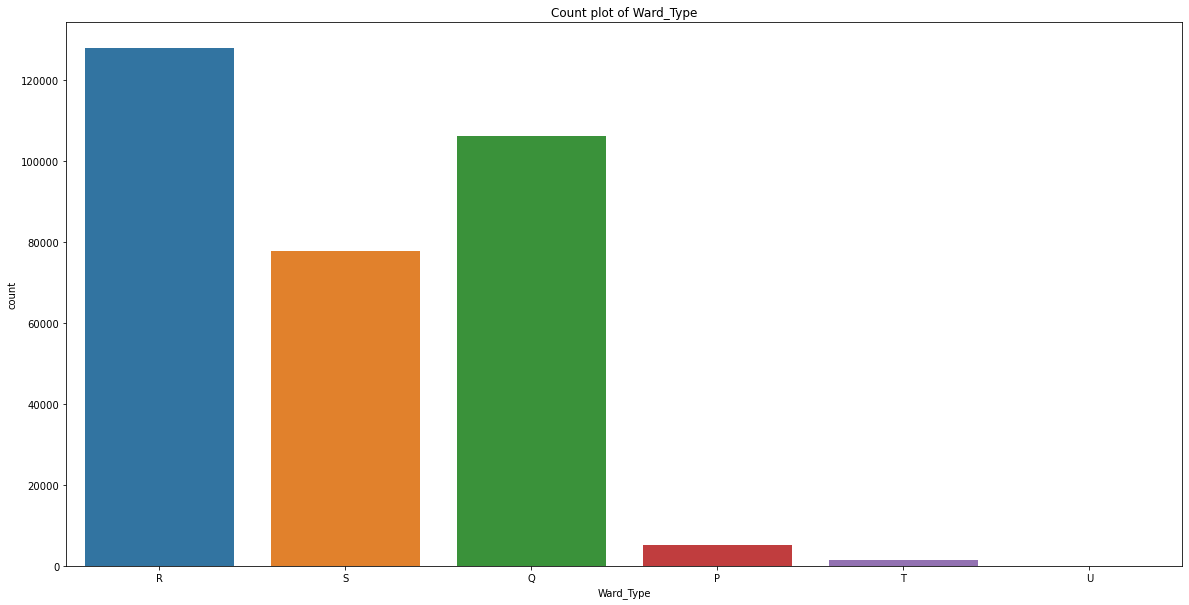

In [35]:
plt.figure(figsize=(20,10))
plt.title('Count plot of Ward_Type')
sns.countplot(x=df['Ward_Type'])
labels = df['Ward_Type'].unique()

plt.xticks(ticks=np.arange(len(labels)))
plt.show()

# 3.13 Ward_Facility_Code

<AxesSubplot:ylabel='Ward_Facility_Code'>

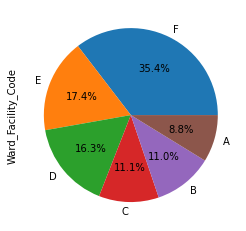

In [30]:
df['Ward_Facility_Code'].value_counts().plot(kind ='pie',autopct='%1.1f%%')

# 3.14 Type of Admission

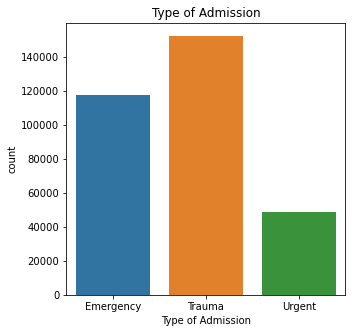

In [32]:
plt.figure(figsize=(5,5))
plt.title('Type of Admission')
sns.countplot(x=df['Type of Admission'])
plt.xticks()
plt.show()

# 4. Feature Engineering

## 4.1 Correlation of Features

<AxesSubplot:>

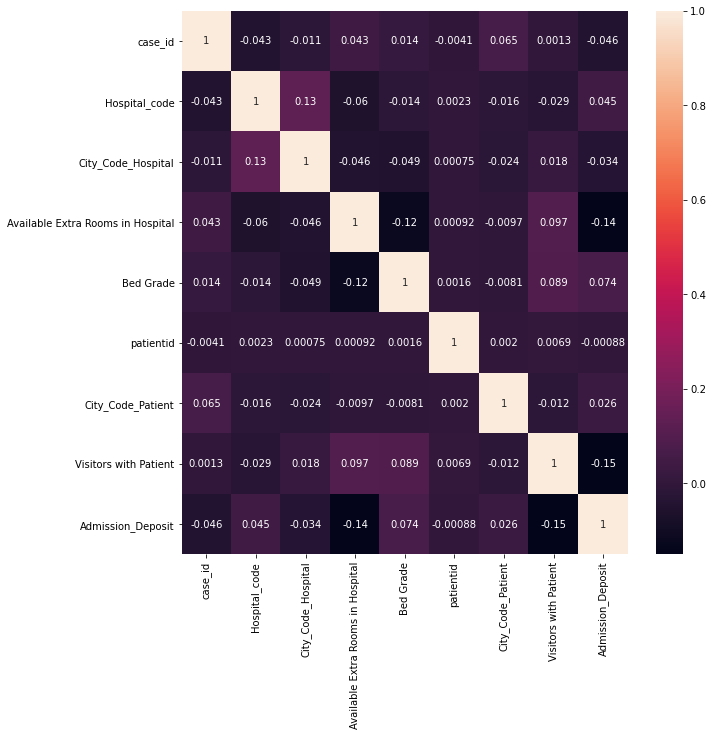

In [36]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot = True)

<AxesSubplot:ylabel='Admission_Deposit'>

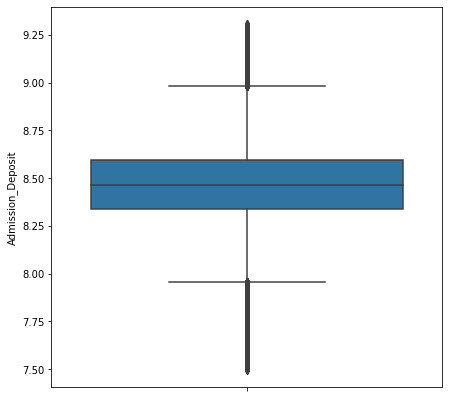

In [37]:
plt.figure(figsize=(7,7))
sns.boxplot(y=np.log(df['Admission_Deposit']))

In [38]:
np.log(df['Admission_Deposit'])

0         8.499233
1         8.691819
2         8.464847
3         8.891787
4         8.622994
            ...   
318433    8.329417
318434    8.809714
318435    8.351139
318436    8.232440
318437    8.466321
Name: Admission_Deposit, Length: 318438, dtype: float64

In [39]:
df.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

# 4.3 Fill Null Values

In [40]:
df['Bed Grade'].fillna(df['Bed Grade'].median(),inplace = True)

In [41]:
df['City_Code_Patient'].fillna(df['City_Code_Patient'].median(),inplace = True)

In [42]:
df.isnull().sum()

case_id                              0
Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            0
patientid                            0
City_Code_Patient                    0
Type of Admission                    0
Severity of Illness                  0
Visitors with Patient                0
Age                                  0
Admission_Deposit                    0
Stay                                 0
dtype: int64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318438 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3184

In [44]:
cat_features = df.select_dtypes(include = 'object').columns
print("Cat features are :",cat_features),len(cat_features)

Cat features are : Index(['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type',
       'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness', 'Age',
       'Stay'],
      dtype='object')


(None, 9)

In [45]:
from sklearn.preprocessing import LabelEncoder

In [46]:
le = LabelEncoder()
for feature in cat_features:
    df[feature] = le.fit_transform(df[feature])

In [47]:
df.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,2,3,2,3,3,2,5,2.0,31397,7.0,0,0,2,5,4911,0
1,2,2,2,5,2,2,3,3,5,2.0,31397,7.0,1,0,2,5,5954,4
2,3,10,4,1,0,2,1,3,4,2.0,31397,7.0,1,0,2,5,4745,3
3,4,26,1,2,1,2,3,2,3,2.0,31397,7.0,1,0,2,5,7272,4
4,5,26,1,2,1,2,3,3,3,2.0,31397,7.0,1,0,2,5,5558,4


In [48]:
df['Severity of Illness'].unique()

array([0, 2, 1])

## 4.3 Log Transform

In [49]:
df['Admission_Deposit'] = np.log(df['Admission_Deposit'])

# 5. Model Building

In [52]:
x = df.drop('Stay',axis = 1)
y = df['Stay']

In [55]:
normal_scaler = MinMaxScaler()
x_scaled = normal_scaler.fit_transform(x)
x = pd.DataFrame(x_scaled, columns = x.columns)

In [56]:
from sklearn.model_selection import train_test_split

x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1)

## 5.1 KNN

In [59]:
knn_model = KNeighborsClassifier()

In [60]:
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [61]:
y_pred = knn_model.predict(x_test)

In [62]:
confusion_matrix(y_test, y_pred)

array([[ 768, 1929, 1329,  499,   29,  167,    3,   19,    4,    4,   10],
       [1382, 7004, 4690, 1754,  110,  584,    8,   71,   15,    8,   28],
       [1199, 5884, 7470, 1945,  136,  692,   12,   84,   18,   11,   29],
       [ 821, 3754, 3701, 1709,   91,  732,   11,   81,   25,    9,   39],
       [ 184,  679, 1034,  288,   36,  115,    4,   22,    2,    3,   10],
       [ 534, 2044, 1945, 1196,   40,  984,    5,  108,   30,   15,   42],
       [  40,  158,  211,   85,    7,   40,    5,    8,    1,    1,    3],
       [ 165,  572,  573,  329,   21,  283,    1,   69,   14,    5,   26],
       [  80,  290,  218,  177,    4,  165,    1,   28,   26,    2,   23],
       [  41,  126,  134,  110,    8,   84,    0,   15,    2,   14,    6],
       [  80,  267,  242,  216,   19,  200,    1,   28,   31,   10,  235]])

In [63]:
cls_report = classification_report(y_test, y_pred)
print(cls_report)

              precision    recall  f1-score   support

           0       0.15      0.16      0.15      4761
           1       0.31      0.45      0.37     15654
           2       0.35      0.43      0.38     17480
           3       0.21      0.16      0.18     10973
           4       0.07      0.02      0.03      2377
           5       0.24      0.14      0.18      6943
           6       0.10      0.01      0.02       559
           7       0.13      0.03      0.05      2058
           8       0.15      0.03      0.04      1014
           9       0.17      0.03      0.05       540
          10       0.52      0.18      0.26      1329

    accuracy                           0.29     63688
   macro avg       0.22      0.15      0.15     63688
weighted avg       0.27      0.29      0.27     63688



### Feature Selection Using Correlation coeff

In [66]:
corr_matrix = df.corr()

In [67]:
corr_matrix

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
case_id,1.000000,-0.043023,0.001877,-0.011352,0.006262,0.042580,-0.002175,-0.029183,-0.011546,0.013691,-0.004150,0.065207,0.076789,0.013935,0.001309,-0.114694,-0.054562,-0.053882
Hospital_code,-0.043023,1.000000,0.039449,0.128294,-0.135920,-0.059638,0.000777,0.161108,-0.132347,-0.013948,0.002291,-0.015477,-0.014268,-0.007585,-0.028500,0.016322,0.046983,0.042846
Hospital_type_code,0.001877,0.039449,1.000000,-0.000839,0.268962,-0.103044,0.001768,0.246347,-0.265768,0.018642,-0.003010,0.055272,0.080073,-0.004625,-0.045213,0.006030,0.028790,0.058592
City_Code_Hospital,-0.011352,0.128294,-0.000839,1.000000,0.008311,-0.045771,0.029308,0.122285,-0.100474,-0.049248,0.000750,-0.024161,-0.015547,-0.000018,0.018184,0.020507,-0.036701,0.006381
Hospital_region_code,0.006262,-0.135920,0.268962,0.008311,1.000000,-0.006906,0.041499,0.077769,-0.507350,-0.042680,-0.002083,0.150714,0.005602,-0.006067,-0.019485,-0.017083,0.079653,0.011905
Available Extra Rooms in Hospital,0.042580,-0.059638,-0.103044,-0.045771,-0.006906,1.000000,0.047726,-0.433849,0.050453,-0.115804,0.000921,-0.009462,-0.016498,0.015053,0.096714,-0.133491,-0.151937,-0.121120
Department,-0.002175,0.000777,0.001768,0.029308,0.041499,0.047726,1.000000,-0.005972,-0.040371,-0.096745,0.002217,0.019500,-0.080768,-0.008075,0.026054,0.035518,-0.078673,0.033287
Ward_Type,-0.029183,0.161108,0.246347,0.122285,0.077769,-0.433849,-0.005972,1.000000,-0.155031,-0.013484,0.000615,0.015692,0.012701,0.001503,-0.096451,0.024332,0.050585,0.185191
Ward_Facility_Code,-0.011546,-0.132347,-0.265768,-0.100474,-0.507350,0.050453,-0.040371,-0.155031,1.000000,0.075984,0.001923,-0.139691,0.043242,0.014844,0.022088,-0.000417,-0.027063,-0.004552
Bed Grade,0.013691,-0.013948,0.018642,-0.049248,-0.042680,-0.115804,-0.096745,-0.013484,0.075984,1.000000,0.001638,-0.007581,0.126075,0.049951,0.088920,0.001717,0.072516,0.025761


# KNN 

In [ ]:
Without Scaling

# Standard Scaler
# MinMax Scaler

With Scaling

With Hyper Parameter Tuning 

# Randomized Search CV
# 1,10

# Decision Tree Algorithm

In [ ]:
With Hyper Parameter Tuning 

# Randomized Search CV
# 1,10

# Random Forest Algorithm

# AdaBoost

# XGBoost

# Improve model Accuracy

In [137]:
# SMOTE(Stnthetic Minority Oversampling Technqiue)

In [ ]:
Log
DT
Recall 

In [138]:
from imblearn.over_sampling import SMOTE

In [152]:
sm = SMOTE(random_state=1)
x_sm,y_sm = sm.fit_resample(x,y.ravel())

In [149]:
len(y_sm)

200956

In [150]:
sum(y_sm == 1)

66985

In [151]:
sum(y_sm == 0)

133971